<div id="image">
<img src="https://www.imt-atlantique.fr/sites/default/files/logo_mt_0_0.png" WIDTH=280 HEIGHT=280>
</div>
<div id="subject">
<CENTER>
</br>
    
</CENTER>
<font size="5"></br> Copernicus Master on Digital Earth</font></br></div>
</CENTER>
<CENTER>
<font size="3"></br>October 20th 2020</font></br></div>
</CENTER>
<CENTER>
<span style="color:blue">lucas.drumetz@imt-atlantique.fr</span>
</CENTER>

</div>

# Lab Session: Dimension reduction

The goal of this lab is to get familiar with the concept of dimension reduction and visualization for high-dimensional data, using Principal Component Analysis (PCA)

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, exposure
from sklearn.decomposition import PCA

# Principal Component Analysis

The goal of this section is to perform PCA on a real hyperspectral dataset to see how it can help visualize, compress and interpret high dimensional remote sensing data. We will make use of the functions implemented in sci-kit learn, the standard Machine Learning Package for Python.

The data is provided courtesy of Naoto Yokoya and Japan Space Systems (only for this lab, please do not distribute). See

Matsuki, T., Yokoya, N., & Iwasaki, A. (2015). Hyperspectral tree species classification of Japanese complex mixed forest with the aid of LiDAR data. IEEE Journal of Selected Topics in Applied Earth Observations and Remote Sensing, 8(5), 2177-2187.

for more details.

First we load and visualize the data:

(207, 268)


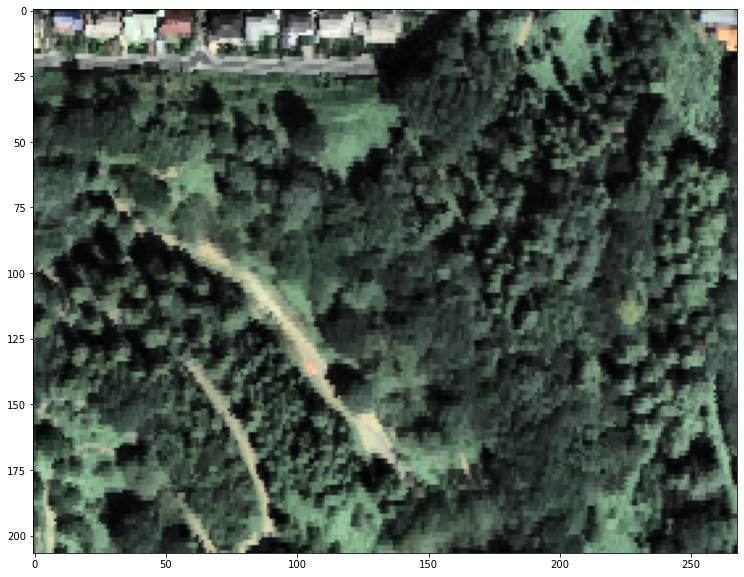

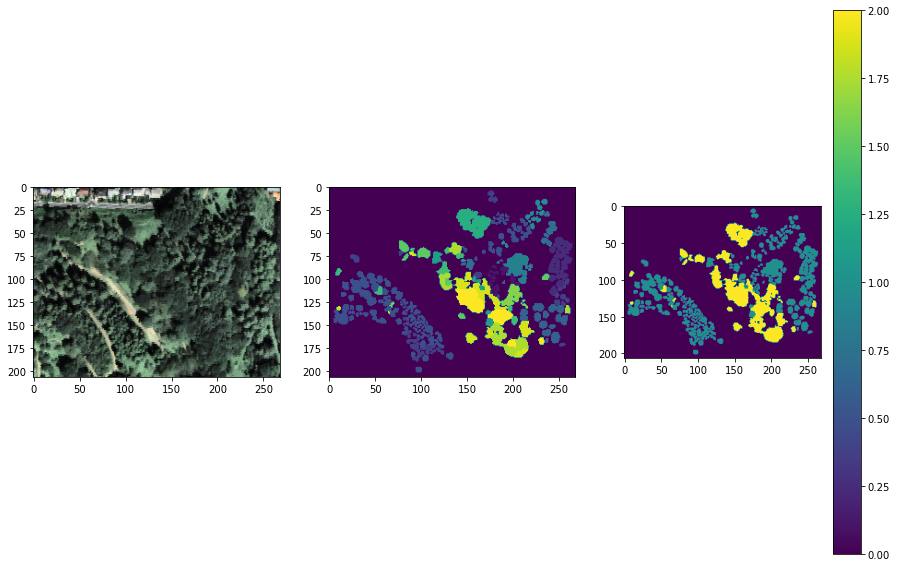

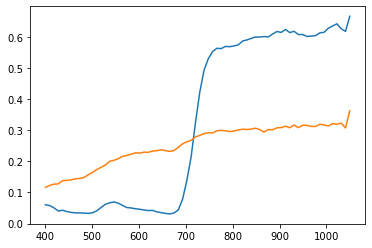

In [7]:
data = sio.loadmat("CASI3_North.mat")
rgb_data = sio.loadmat("rgb.mat")
classinfo = sio.loadmat("GT_North.mat")

wavelengths = np.linspace(400,1050,72) # 72 wavelenghts in the visible and near IR

im = data['hyper'].astype("double")


im = (im - np.amin(im))/(np.amax(im) - np.amin(im)) # rescale data between 0 and 1

imrgb = rgb_data['rgb_adjust']

class_img = classinfo['class']

# get labels for both classes: conifer trees and broadleaf trees

binary_class_img = np.zeros(np.shape(class_img))

print(binary_class_img.shape)

binary_class_img[class_img <=9] = 1 # conifer
binary_class_img[class_img >9] = 2 # broadleaf
binary_class_img[class_img == 0] = 0 # unclassified


# display

plt.figure(figsize=(15,10))
plt.imshow(imrgb)

plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(imrgb)

plt.subplot(132)
plt.imshow(class_img)

plt.subplot(133)
plt.imshow(binary_class_img)
plt.colorbar()

plt.figure()
plt.plot(wavelengths, im[50,50,:]) # one vegetation pixel
plt.plot(wavelengths, im[112,90,:]) # one man made pixel





**Q: What are the main broad classes of materials that are present in the image?**

(72, 7726)
(72, 4895)


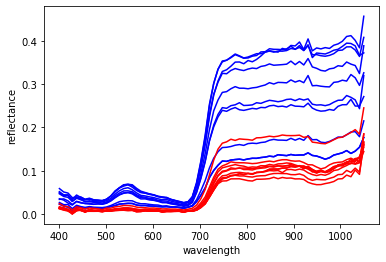

555.6338028169014
702.1126760563379


In [8]:
# %matplotlib qt
%matplotlib inline

[m,n,L] = np.shape(im)
im_r = np.reshape(im,(m*n,L)).T # we reshape the data cube into a matrix of size LxN, with L the number
# of wavelgnths and N the number of pixels

conifer_pixels = im[binary_class_img == 1,:].T
print(conifer_pixels.shape)

broadleaf_pixels = im[binary_class_img == 2,:].T
print(broadleaf_pixels.shape)


plt.figure()
plt.plot(wavelengths,conifer_pixels[:,0:10], 'b')
plt.plot(wavelengths,broadleaf_pixels[:,0:10],'r')
plt.xlabel('wavelength')
plt.ylabel('reflectance')
plt.show()

print(wavelengths[17])
print(wavelengths[33])

**Q: What are the main differences between spectra of conifer and broadleaf trees?**

The spectra of conifer are shown in blue while the spectra of broadleaf pixels are shown in red. A generally higher intensity values are observed in the reflectance of the conifer trees, both at lower spectra and at higher spectra range. This shows the strong greenness of the conifer teees than the broadleaf trees.

**Q: First plot the mean value of the data (the mean spectrum over all pixlels). Does it look more like a vegetation spectrum or the spectrum of some man-made material? Why?**

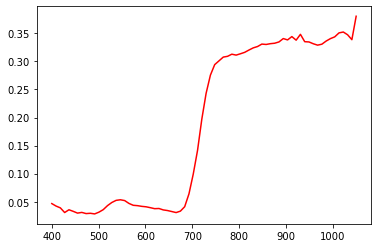

In [9]:
## TO DO ##
plt.figure()
plt.plot(wavelengths, np.mean(im_r, axis=1).T, 'r') # mean per spectrum

The plot of the overall mean spectrum over all the pixels shows a very strong spectral pattern that is similar to that of vegetation, with high intensity in the red and NIR bands and particular peak in the red band (600 -- 650) and strong intensity in the NIR spectral band (650 to 1200).

We will use the built-in scikit learn functions to represent the principal components and the coefficients.

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

**Q: Use the PCA class to compute the decomposition, using pca.fit, with 72 components (all of them).\
Plot the eigenvalues, together with the explained variance as functions of the component number, you can recover them with pca.singular_values_ and pca.explained_variance_ratio_.**

**Similarly, use pca.components to recover the components, and plot them. What do they look like and what are their dimensions?**


**Finally, compute the coefficients of the decomposition using pca.transform. What are their dimensions?**


**You can represent them as images, if you reshape them (use the function numpy.reshape for that).**


**Can you interpret some of the components using the coefficients as well as the components themselves (what do they represent)?**


Text(0.5, 1.0, 'Singular Value')

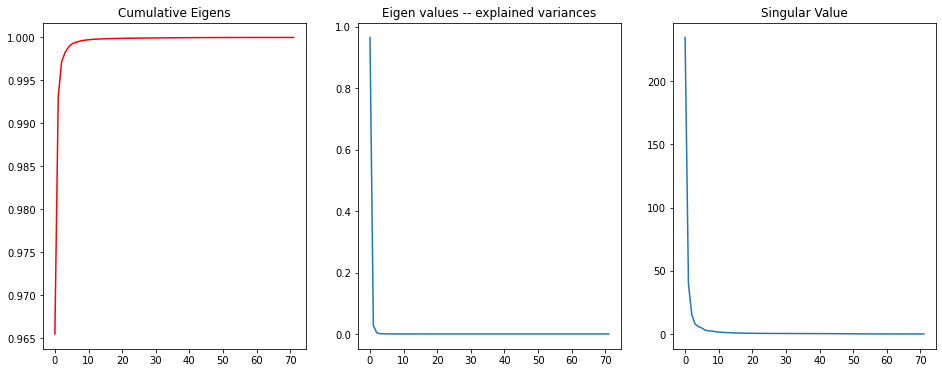

In [11]:
# PCA components
# Compute the PCA
n_components = 72
pca = PCA(n_components=n_components)
# Fit PCA
pca.fit(im_r.T)

# Get eigenvalues
ratio = pca.explained_variance_ratio_ # eigen values #Percentage of variance explained by each of the selected components.
sing_val = pca.singular_values_
# get the cumulative eigens
cum_exp = np.cumsum(ratio)

# display
fig, axs = plt.subplots(1, 3, figsize = (16, 6))
axs[0].plot(cum_exp, 'r') # mean per spectrum
axs[0].set_title("Cumulative Eigens")

axs[1].plot(ratio)
axs[1].set_title("Eigen values -- explained variances")

axs[2].plot(sing_val)
axs[2].set_title("Singular Value")

Text(0.5, 1.0, 'Eigen values as a function of explained variance')

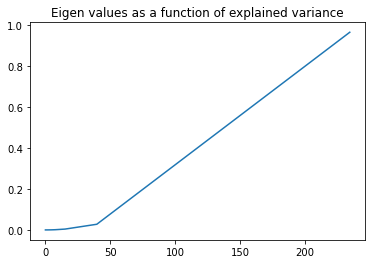

In [12]:
# display the explained variance and the singular values
plt.plot(sing_val, ratio)
plt.title("Eigen values as a function of explained variance")

Text(0.5, 1.0, 'Principal Component 2 - explains 0.4% of the variance')

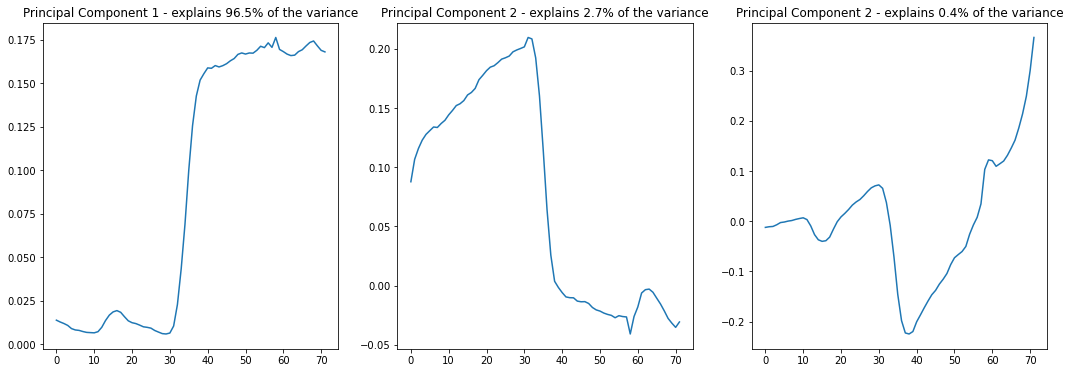

In [13]:
# Similarly, use pca.components to recover the components, and plot them. 
# What do they look like and what are their dimensions?
fig, axs = plt.subplots(1, 3, figsize = (18, 6))
comp = pca.components_

axs[0].plot(comp[0,:])
axs[0].set_title(f"Principal Component 1 - explains 96.5% of the variance")

axs[1].plot(comp[1,:])
axs[1].set_title(f"Principal Component 2 - explains 2.7% of the variance")

axs[2].plot(comp[2,:])
axs[2].set_title(f"Principal Component 2 - explains 0.4% of the variance")

Text(0.5, 1.0, 'First five components')

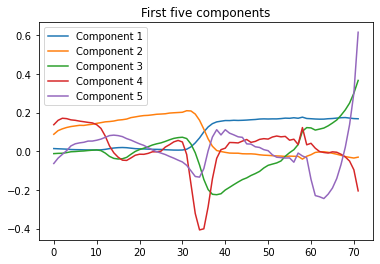

In [14]:
labels = ["Component 1", "Component 2", "Component 3", "Component 4", "Component 5"]

plt.plot(comp[:5,:].T)
plt.legend(labels)
plt.title("First five components")

In [15]:
print("Dimension of components: ", comp.shape)

Dimension of components:  (72, 72)


The dimension of the PCA correspond to the number of components in the eigen vectors and their number of values per axis. We see that the output dimension returns a dimension 72 by 72 giving a useful 72 components each with 72 vectors projected on the eigen value axis. 

Text(0.5, 1.0, 'PCA Coefficient 1 -- 3')

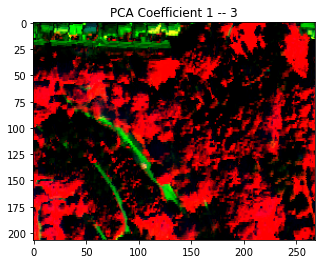

In [16]:
# display pca coefficients

reduced_img = pca.transform(im_r.T)
# plt.plot(reduced_img)
trans_img = reduced_img.reshape((m, n, L))
plt.imshow(np.clip(trans_img[:, :, :3], 0, 1))
plt.title("PCA Coefficient 1 -- 3")

The  first three PCA coefficients, corresponding to the three most important scores, highlights the vegetation, the manmade features and other distinguishable feature in the multispectral image.

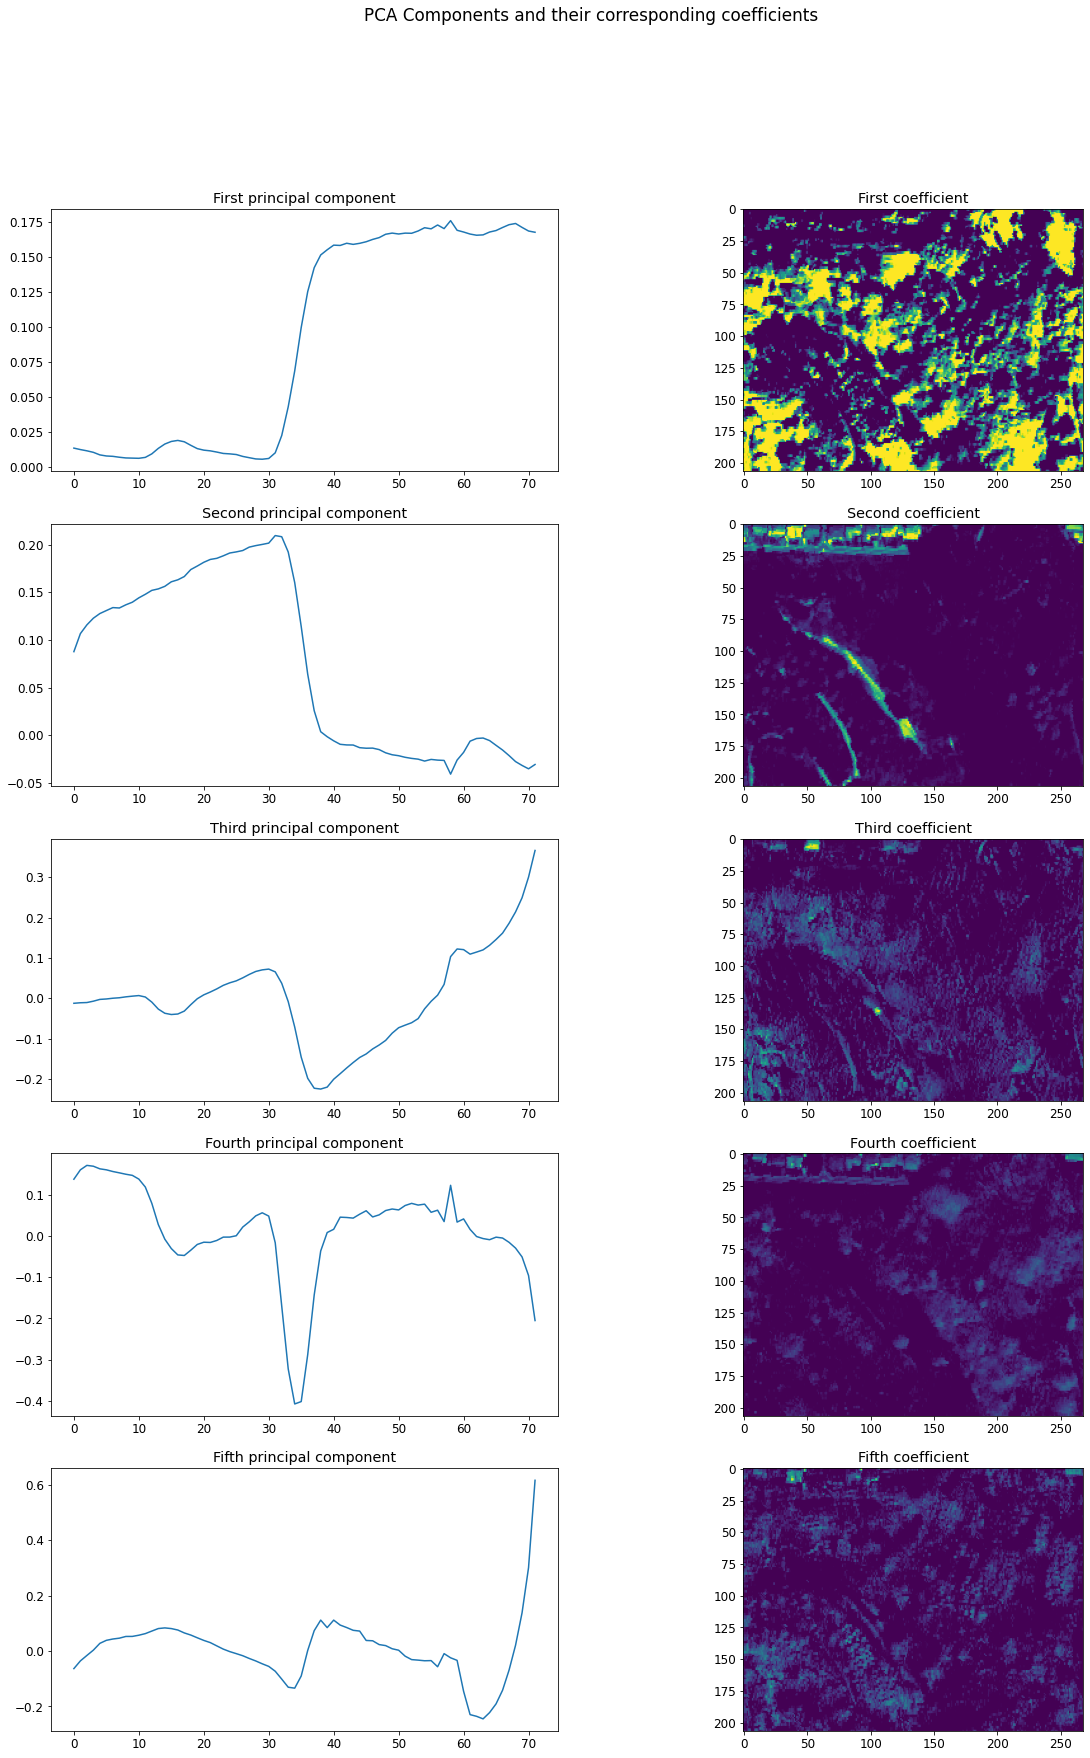

In [21]:
fig, axs = plt.subplots(5, 2, figsize = (20, 28))

axs[0, 0].plot(comp[0,:])
axs[0, 0].set_title("First principal component")

axs[0, 1].imshow(np.clip(trans_img[:, :, 0], 0, 1))
axs[0, 1].set_title("First coefficient")

axs[1, 0].plot(comp[1,:])
axs[1, 0].set_title("Second principal component")

axs[1, 1].imshow(np.clip(trans_img[:, :, 1], 0, 1))
axs[1, 1].set_title("Second coefficient")

axs[2, 0].plot(comp[2,:])
axs[2, 0].set_title("Third principal component")

axs[2, 1].imshow(np.clip(trans_img[:, :, 2], 0, 1))
axs[2, 1].set_title("Third coefficient")

axs[3, 0].plot(comp[3,:])
axs[3, 0].set_title("Fourth principal component")

axs[3, 1].imshow(np.clip(trans_img[:, :,3], 0, 1))
axs[3, 1].set_title("Fourth coefficient")

axs[4, 0].plot(comp[4,:])
axs[4, 0].set_title("Fifth principal component")

axs[4, 1].imshow(np.clip(trans_img[:, :, 4], 0, 1))
axs[4, 1].set_title("Fifth coefficient")
plt.rc('font', size=14)
plt.suptitle("PCA Components and their corresponding coefficients")
plt.show()

**Q: Almost all the variance in the data is explained by only a few components: are they interpretable? What parts of the image do they explain, respectively?** \
Based on the outcome of the PCA, the highest variance in the multispectral image is explained by the first components (when sorted) reaching about 97% of the variance, the following components explains 2.7 and 0.4% of the variance while the other components takes the large chunk of the data, without much explanation of the data. When compared with the corresponding coeffcients, we can see that the first components aligns closely to the vegetation pixels, which reflects the overall spectral characteristics of the image shown earlier. The other two components that were shown are not immediately interpretable and do not exactly show the features of interest -- conifer and broadleaf trees. 

We define a function to enhance the brigthness of an RGB image:

In [22]:
# from skimage import color, exposure

def enhance_brightness_rgb(rgb_original):
    yuv= color.rgb2yuv(rgb_original) # change color space to radiance, chrominance
    p_low, p_high = np.percentile(yuv[:,:,0], (0.1,99.9)) # saturate outlier values in radiance (0.1,99.9)
    yuv[:,:,0] = exposure.rescale_intensity(yuv[:,:,0], in_range=(p_low, p_high)) # rescale radiance
    mod_rgb =  color.yuv2rgb(yuv) # transform back to rgb space
    return mod_rgb


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Brightness enhanced image')

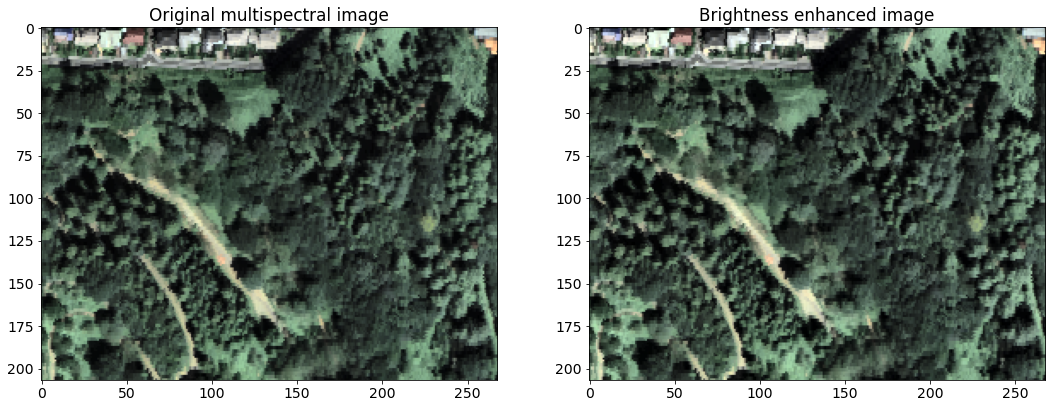

In [23]:
bright = enhance_brightness_rgb(imrgb)

fig, axs = plt.subplots(1, 2, figsize = (18, 12))
axs[0].imshow(imrgb)
axs[0].set_title("Original multispectral image")

axs[1].imshow(bright)
axs[1].set_title("Brightness enhanced image")

**Q: The dataset can be projected in the 2D latent space given by the first 2 principal components (each pixel is represented only by the first two coefficients of the PCA decomposition). Make a scatterplot of the data points in the space spanned by the first 2 eigenvectors. Can you locate vegetation pixels, and others?**

You can use as colors the binary image with the class labels to spot conifer and broadleaf pixels.

Text(0, 0.5, 'Second principal component')

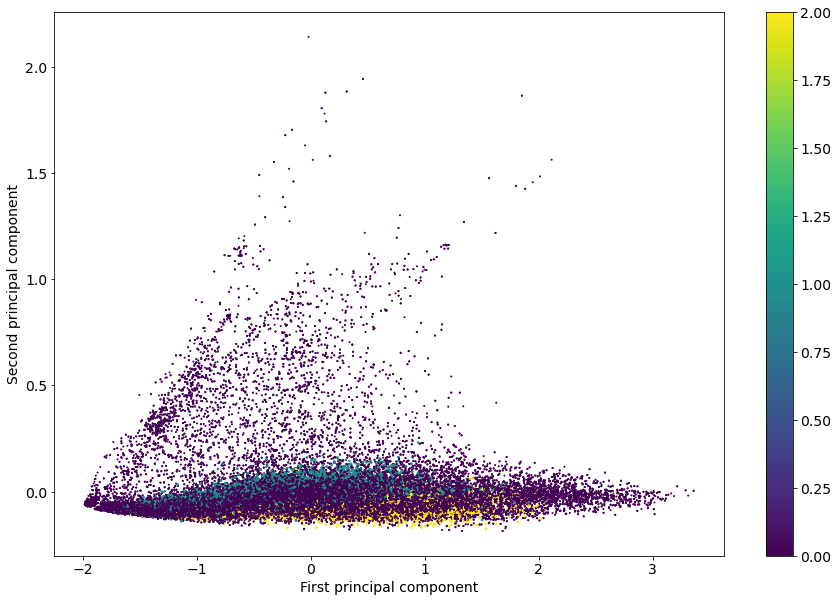

In [24]:
# projection of image coefficients in 2D latent space

plt.figure(figsize = (15,10))
plt.scatter(
    trans_img[:, :, 0],trans_img[:, :, 1], # 1 conifer
    c = binary_class_img.ravel(), # 2 broadleaf
    s=(1+(binary_class_img.ravel()!= 0))) # 0 unclassified

plt.colorbar()
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

The projection of the coefficients in the 2D latent space shows the correlation between the first principal component and the second principal component. In this part of this, we identified the coniferous trees (shown in green) and the broadleaf trees shown in yellow, having strong correlation with the unclassified components. While this interactions exists between the two components, the broadleaf and conferous trees data points are still identifiable in the 2D latent space but overlapped with the unclassified portions of the image.

**Q: Reconstruct the image using 1,2,5,10 and 72 components. Visually assess and describe in each case how well the data is reconstructed (e.g. by comparing the reconstructed rgb image with the true one, or plotting reconstructed spectra). Compute the mean absolute error in each pixel in each case**

The reconstruction for all data points using K components can be obtained by computing:
\begin{equation*}
\hat{\mathbf{X}} = \bar{\mathbf{X}} + \mathbf{U}_{K}\mathbf{A}_{K} 
\end{equation*}
where $\hat{\mathbf{X}}\in\mathbb{R}^{D\times N}$, and  $\mathbf{U}\in \mathbb{R}^{D\times K}$, and $\mathbf{A}^{K\times N}$. $\bar{\mathbf{X}}\in\mathbb{R}^{D\times N}$ is  a matrix containing the mean of the data in each column.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(72, 72)
(55476, 72)
(72,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 2160x1080 with 0 Axes>

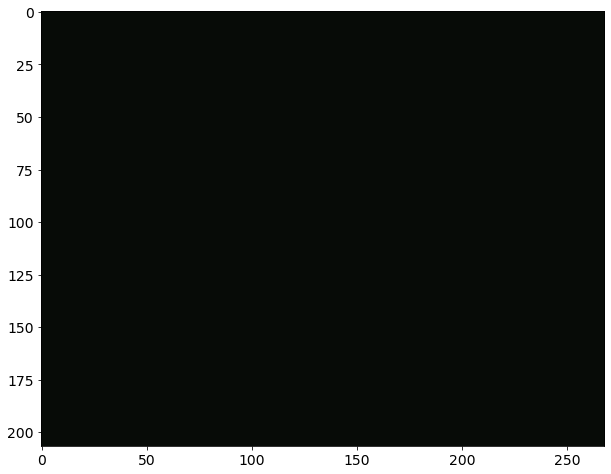

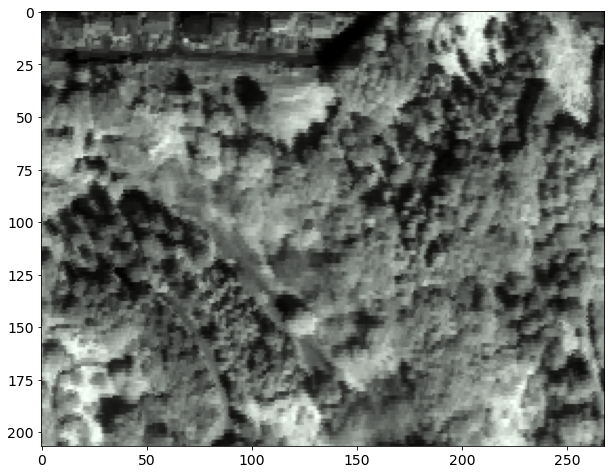

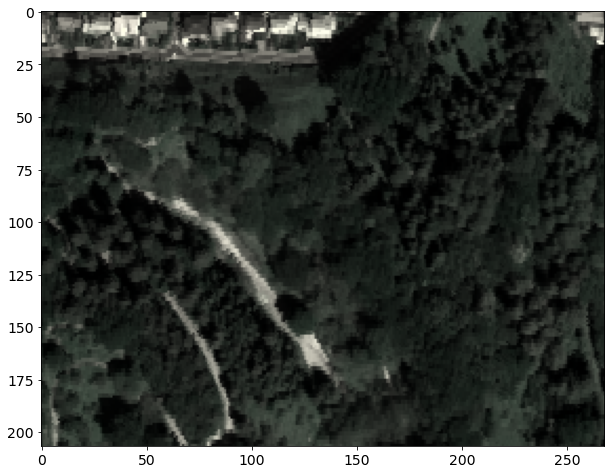

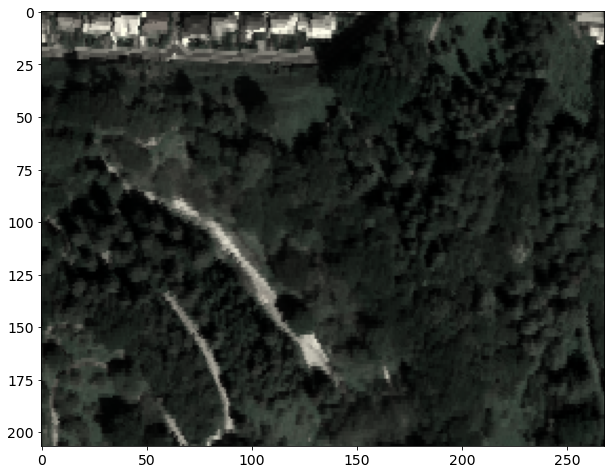

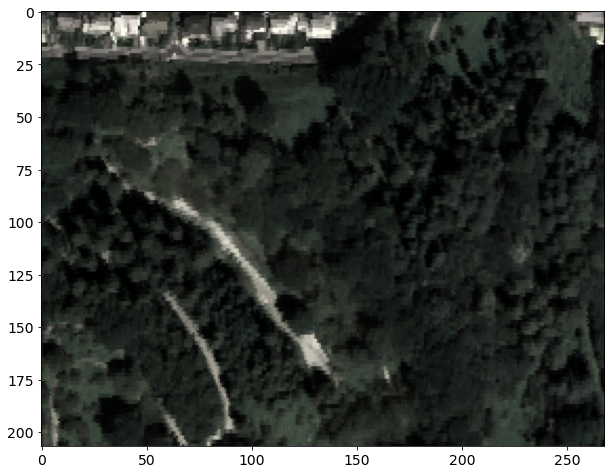

In [27]:
# reconstruct image from only a few components
# rgb image
k = [1,2,5,10,72]

components = comp
scores = reduced_img
mean = np.mean(im_r, axis=1)
plt.figure(figsize =(30,15))

print(components.shape)
print(scores.shape)
print(mean.shape)

for i in range(len(k)):
    reconstructed_image = np.dot(scores[:, :i], components[:i, :])
    reconstructed_image += mean
    rec_im = np.reshape(reconstructed_image,(m,n,L))
    plt.figure(figsize = (30,8))
    plt.imshow(enhance_brightness_rgb(np.clip(rec_im[:,:,[29,18,6]], 0, 1)))

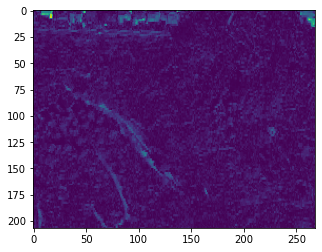

In [242]:
abs_diff = np.abs(im -rec_im_final)
plt.imshow(abs_diff[:, :, 3])

In [39]:
MAE = np.mean(abs_diff, axis=2)
MAE.shape

(207, 268)

(72,)


Text(0.5, 1.0, 'Mean Absolute Error')

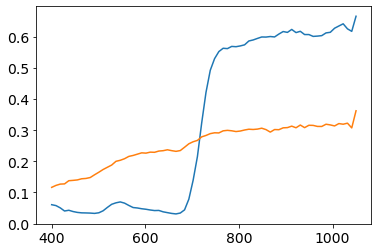

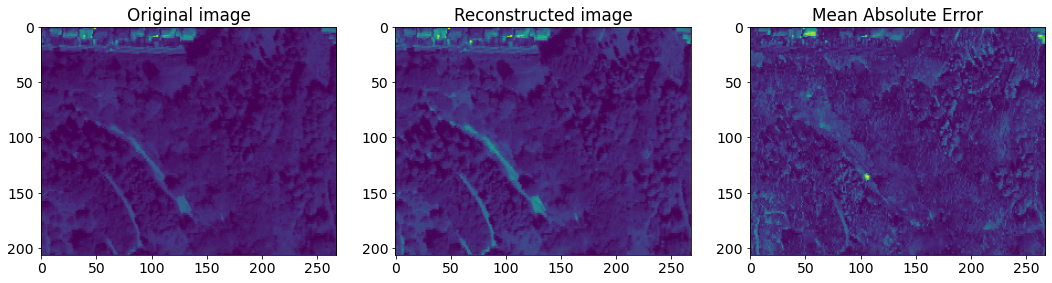

In [42]:
# keep 2 components
final_nbr = 2
# print( np.dot(components[:final_nbr,:].T,scores[:,:final_nbr].T).T.shape)
# print(components[:final_nbr,:].shape)
mean =  np.mean(im_r,axis = 1) 
print(mean.shape)

# pixel reconstruction
reconstructed_image_final = np.dot(components[:final_nbr,:].T,scores[:,:final_nbr].T).T
reconstructed_image_final += mean
rec_im_final = np.reshape(reconstructed_image_final, (m,n,L))

# absolute difference
## TO DO ##
abs_diff = np.abs(im - rec_im_final)
MAE = np.mean(abs_diff, axis = 2)

plt.figure()
plt.plot(wavelengths, im[50,50,:]) # one vegetation pixel
plt.plot(wavelengths, im[112,90,:]) # one man made pixel
## TO DO ##


fig, axs = plt.subplots(1, 3, figsize = (18, 12))

axs[0].imshow(im[:, :, 3])
axs[0].set_title("Original image")

axs[1].imshow(rec_im_final[:, :, 3])
axs[1].set_title("Reconstructed image")

axs[2].imshow(MAE)
axs[2].set_title("Mean Absolute Error")

**Q: Finally, take a look at the last components and the associated coefficients. Are the components easy to interpret? How about the coefficients: what do they look like? Is it worth it to keep all the components (give 2 reasons why or why not)**

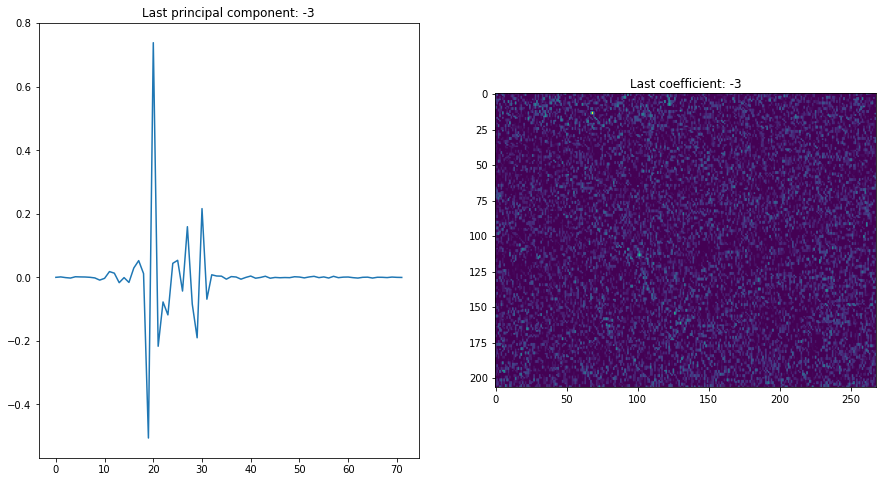

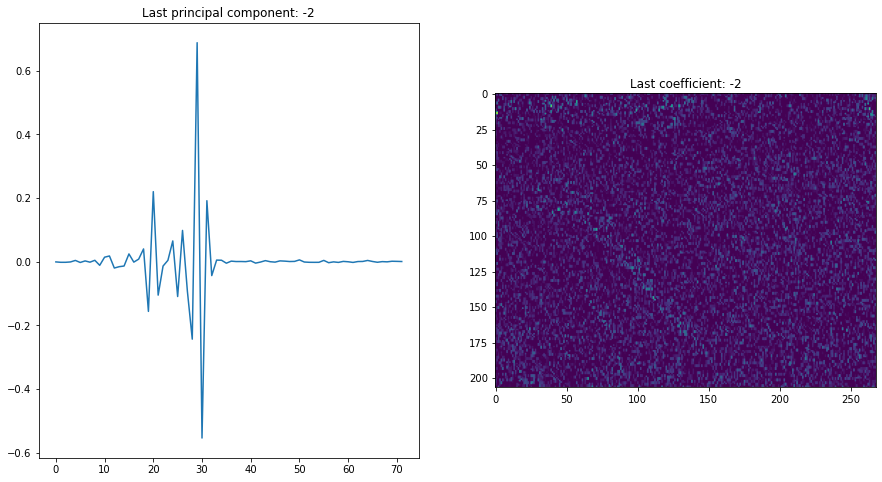

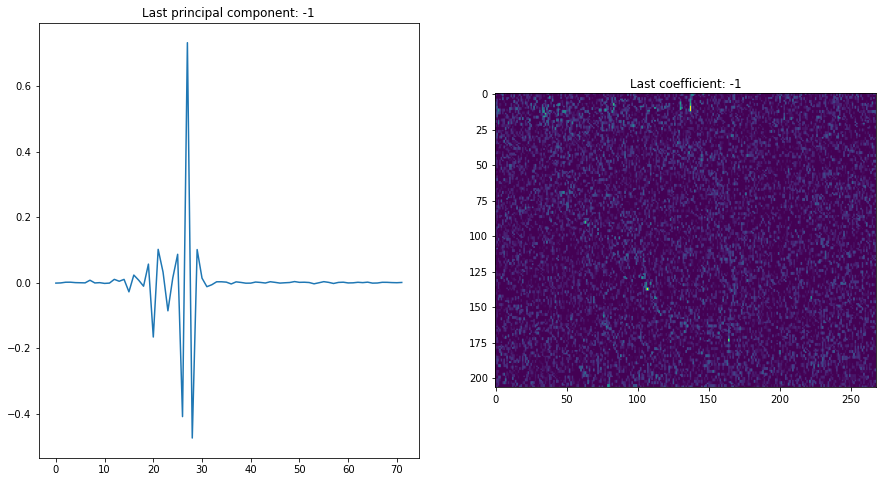

In [258]:
# last three components
## TO DO ##
last_comp = [-3, -2, -1]

for i in last_comp:
    l_comp = comp[i,:]
    last_coeff = trans_img[:, :, i]
    
    fig, axs = plt.subplots(1, 2, figsize = (15, 8))
    
    axs[0].plot(l_comp)
    axs[0].set_title(f"Last principal component: {i}")
    axs[1].imshow(np.clip(last_coeff, 0, 1))
    axs[1].set_title(f"Last coefficient: {i}")

We check for the last three components in the PCA matrix and we found pattern spectra that do not correspond to our features of interest in the image. It is difficult to attribute the output of these last three vector to any natural features in our image, and the closest we can find is the heartbeat of a human, which is out of scope for this analysis. Hence, we cannot keep this components in our analysis.
This is an expected outcome, given a sorted array of Principal Components, the last components are expected to contribute the least to our data -- which might indicate some random noise or tiny perturbations captures in the image but do not cause any significant distortion to the image itself. 

**Q: Bonus: Now perform a new PCA decomposition using only as a dataset the set of labeled pixels. Plot the dataset in the 2D space spanned by the first two components. What can you say about the new components and the separability of both classes rather than in the PCA space of the whole dataset?**

In [66]:
# # %matplotlib qt
# %matplotlib inline

nb_conifer_pixels = np.shape(conifer_pixels[1])
nb_broadleaf_pixels = np.shape(broadleaf_pixels[1])
new_data = np.concatenate((conifer_pixels, broadleaf_pixels),axis = 1)

# Compute the PCA
## TO DO ##
n_components = 72
new_pca = PCA(n_components=n_components)

# fit new PCA
new_pca.fit(new_data)

# obtain the eigen values
new_ratio = new_pca.explained_variance_ratio_ # eigen values #Percentage of variance explained by each of the selected components.
new_sing_val = new_pca.singular_values_

# get the cumulative eigens
new_cum_exp = np.cumsum(ratio)

In [85]:
conifer_pixels.shape
broadleaf_pixels.shape
new_data.shape

(72, 12621)

Text(0, 0.5, 'Second principal component')

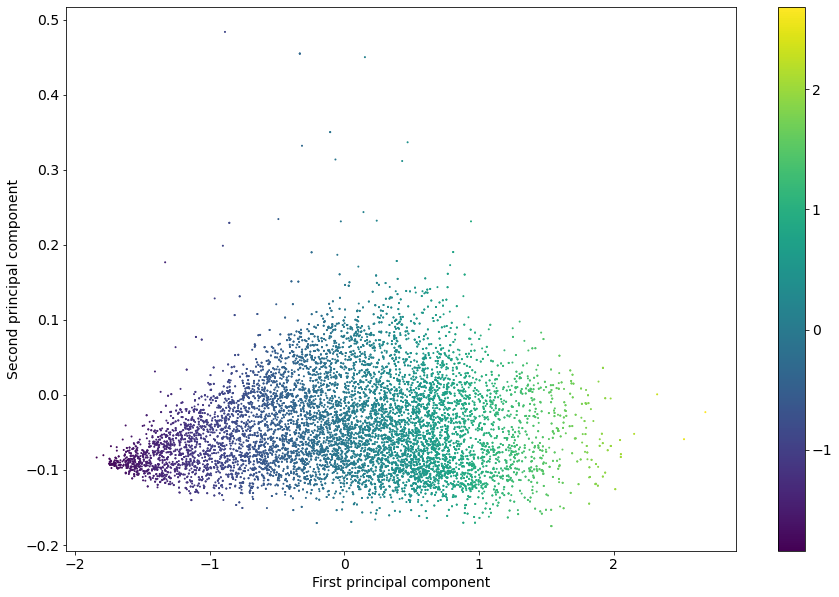

In [93]:
# projection of image coefficients in 2D latent space
coeff = pca.transform(new_data.T)

plt.figure(figsize = (15,10))
plt.scatter(
    coeff[:, 0],coeff[:, 1], # 1 conifer
    c = (coeff[:, 0]), # 2 broadleaf
    s=(1+(coeff[:, 0]) != 0)) # 0 unclassified

plt.colorbar()
plt.xlabel("First principal component")
plt.ylabel("Second principal component")